# 1) Problem Identification
### High employee turn-over rate !
### Develop a model that can predict employee churn
#### #Labelled data
#### #Classification and regression analysis


# 2) EDA (Explotary Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

In [2]:
#Load dataset
df = pd.read_csv('Employee-Attrition.csv')

In [3]:
#Create a copy of the dataframe
df_copy = df

In [4]:
df_copy.shape

(1470, 35)

In [5]:
#Check data attributes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Dictionary
#### AGE Numerical Value

#### ATTRITION Employee leaving the company (0=no, 1=yes)

#### BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)

#### DAILY RATE Numerical Value - Salary Level

#### DEPARTMENT (1=HR, 2=R&D, 3=Sales)

#### DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME

#### EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')

#### EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)

#### EMPLOYEE COUNT Numerical Value

#### EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID

#### ENVIRONMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

#### GENDER (1=FEMALE, 2=MALE)

#### HOURLY RATE Numerical Value - HOURLY SALARY

#### JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

#### JOB LEVEL Numerical Value - LEVEL OF JOB

#### JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)

#### JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

#### MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)

#### MONTHLY INCOME Numerical Value - MONTHLY SALARY

#### MONTHLY RATE Numerical Value - MONTHLY RATE

#### NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT

#### OVER 18 (1=YES, 2=NO)

#### OVERTIME (1=NO, 2=YES)

#### PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY

#### PERFORMANCE RATING Numerical Value - PERFORMANCE RATING

#### RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION

#### STANDARD HOURS Numerical Value - STANDARD HOURS

#### STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)

#### TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED

#### TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING

#### WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE

#### YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY

#### YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE

#### YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION

#### YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [6]:
#View top 5 data
pd.set_option('display.max_columns', None)
df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#View bottom 5 data
df_copy.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [8]:
#List of categorical and numerical featues
cat_col = df.select_dtypes(exclude=np.number).columns
num_col = df.select_dtypes(include=np.number).columns
for i in cat_col:
    print(f'\n========= {i} \n')
    print(df[i].value_counts())


========= Attrition 

No     1233
Yes     237
Name: Attrition, dtype: int64

========= BusinessTravel 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

========= Department 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

========= EducationField 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

========= Gender 

Male      882
Female    588
Name: Gender, dtype: int64

========= JobRole 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

========

In [9]:
#Drop useless columns and columns with one unique value
df_copy = df_copy.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [10]:
#Convert our label from Yes/No to 1/0
df_copy['Attrition'] = df_copy['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [11]:
# Check if null values exist
if df_copy.isnull().values.any() == False:
    print('No null value in the dataset')
df_copy.isnull().sum()

No null value in the dataset


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
df_copy.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#Check the correlation
df_copy.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<AxesSubplot:>

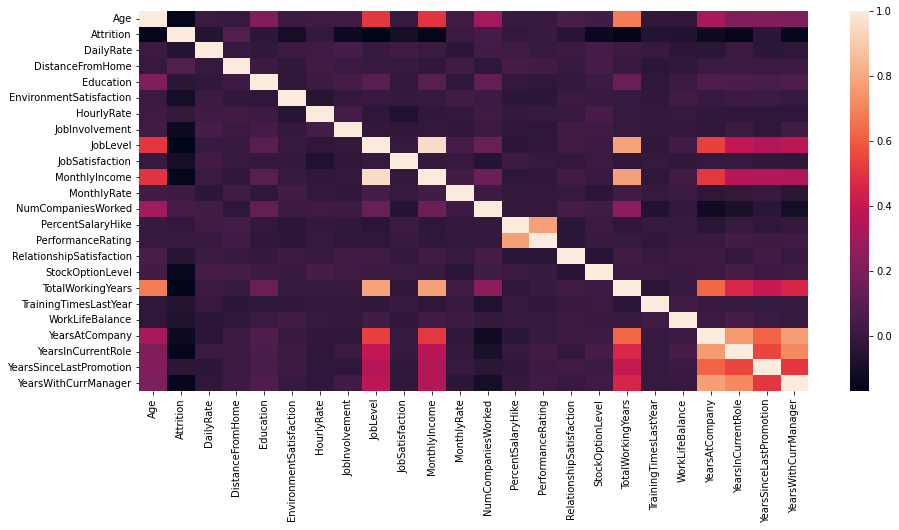

In [14]:
#Plot the correlation
plt.figure(figsize=(15,7))
sns.heatmap(df_copy.corr())

<AxesSubplot:>

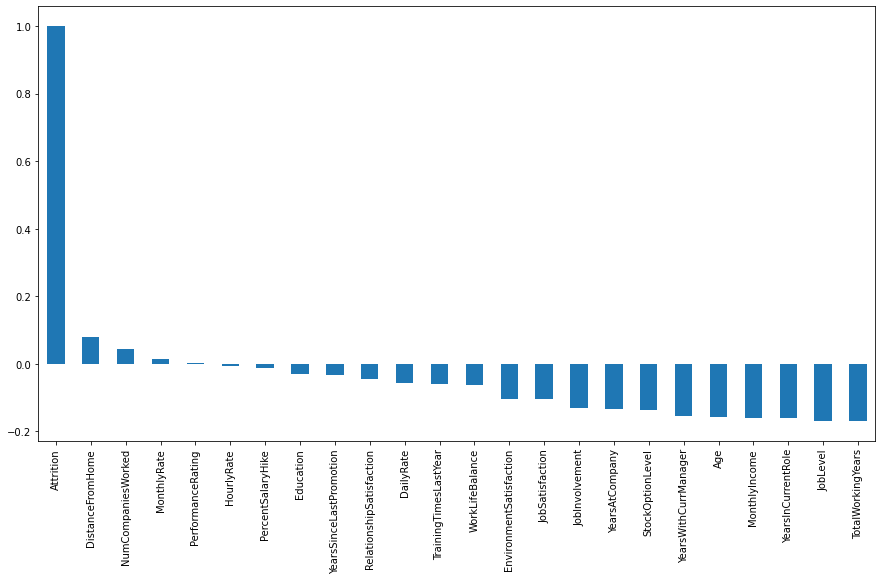

In [15]:
# Check the correlation of Attrition with other attributes
plt.figure(figsize=(15,8))
df_copy.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar')

#### In general, the correlations of other attributes with our target column Attrition are considered weak in a range from 0.2 to -0.2

## 2)i) Data Visualization

Text(0.5, 1.0, 'Attrition Distribution')

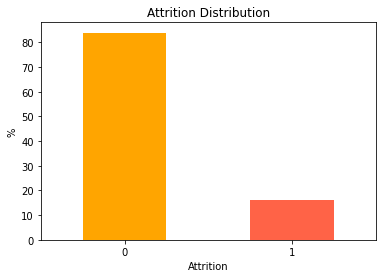

In [16]:
#Visualize the Attrition column
colors = ['#FFA500','#FF6347']
ax = (df_copy['Attrition'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.set_ylabel('%')
ax.set_xlabel('Attrition')
ax.set_title('Attrition Distribution')

Text(0.5, 1.0, 'BusinessTravel Distribution')

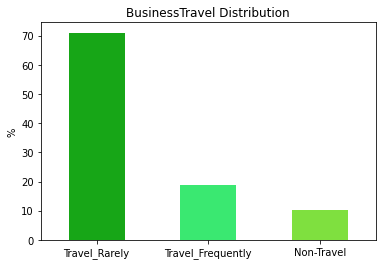

In [17]:
#Visualize the BusinessTravel column
colors = ['#17a617','#3ae871','#7fe03f']
ax = (df_copy['BusinessTravel'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.set_ylabel('%')
ax.set_title('BusinessTravel Distribution')

Text(0.5, 1.0, 'Department Distribution')

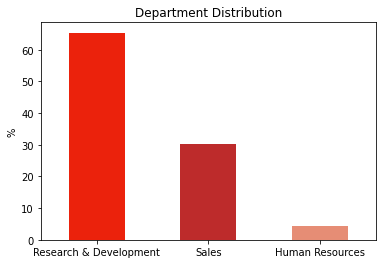

In [18]:
#Visualize the Department column
colors = ['#eb220c','#bd2b2b','#e68d75']
ax = (df_copy['Department'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.set_ylabel('%')
ax.set_title('Department Distribution')

Text(0.5, 1.0, 'EducationField Distribution')

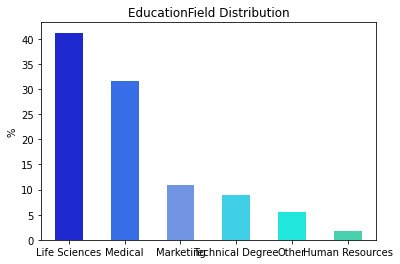

In [19]:
#Visualize the EducationField column
colors = ['#1d29cf','#386de8','#7194e3','#3ecfe6','#20e6dc','#47d1ac']
ax = (df_copy['EducationField'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.set_ylabel('%')
ax.set_title('EducationField Distribution')

Text(0.5, 1.0, 'Gender Distribution')

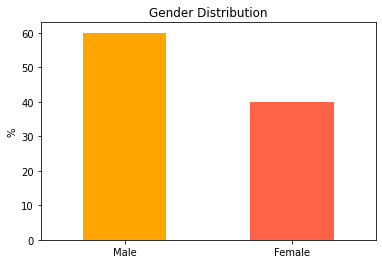

In [20]:
#Visualize the Gender column
colors = ['#FFA500','#FF6347']
ax = (df_copy['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.set_ylabel('%')
ax.set_title('Gender Distribution')

# 3)Feature Engineering

## 3)i) Identify and Resolve Outliers

In [21]:
# Extract numerical data
Numeric_col = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
              'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
              'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
              'YearsSinceLastPromotion', 'YearsWithCurrManager']

print(len(Numeric_col))

15


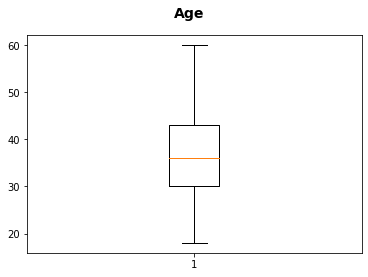

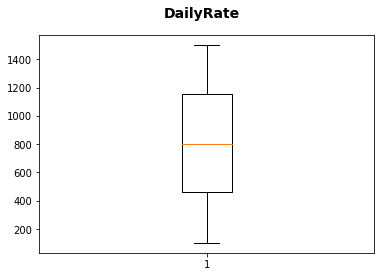

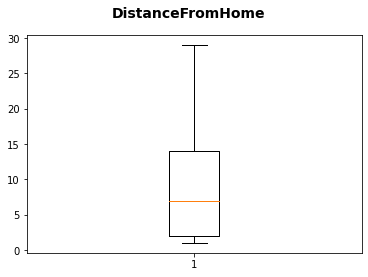

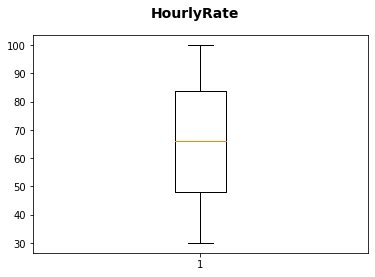

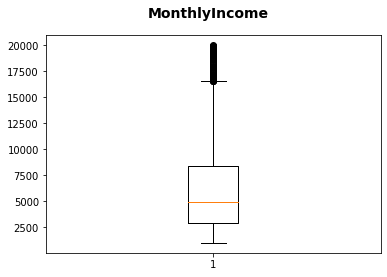

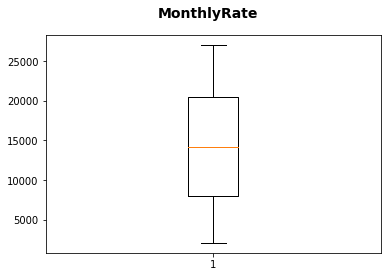

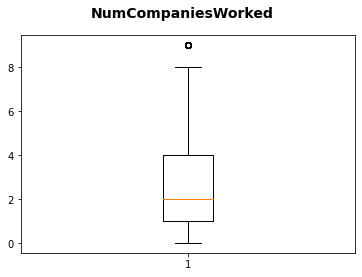

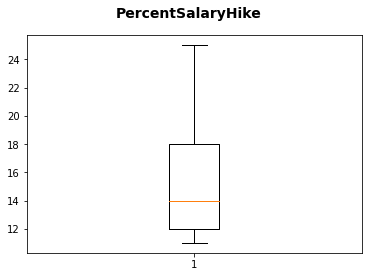

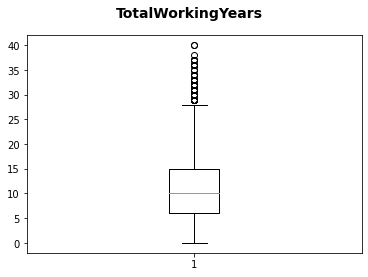

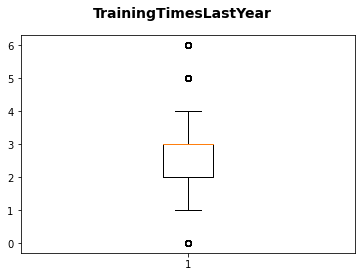

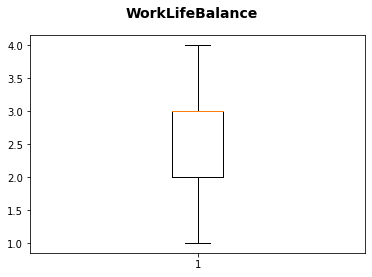

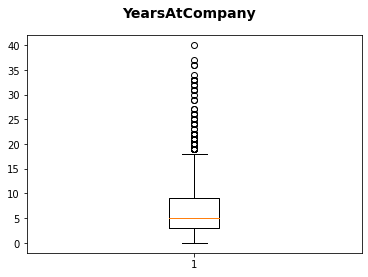

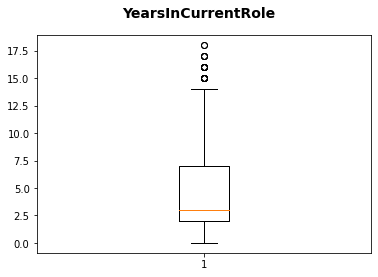

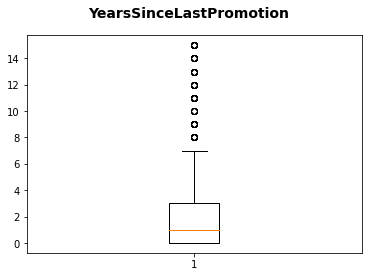

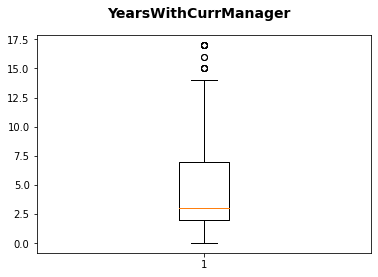

In [22]:
#Show data in boxplots
Numeric_dic = {}
for x in Numeric_col:
    Numeric_dic[x]= df_copy[x].to_numpy()
    
for x in Numeric_dic:
    fig = plt.figure()
    fig.suptitle(x, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.boxplot(Numeric_dic[x])
    plt.show()

#### Based on the boxplots, we can know that feature with outliers are MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

### Quantile based flooring and capping technique.
#### In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.


In [23]:
#The data points that are lesser than the 10th percentile are replaced with the 10th percentile value 
#and the data points that are greater than the 90th percentile are replaced with 90th percentile value.
for x in Numeric_col:
    tenth_percentile = np.percentile(df_copy[x], 10)
    ninetieth_percentile = np.percentile(df_copy[x], 90)
    df_copy[x].values[df_copy[x] < tenth_percentile] = tenth_percentile
    df_copy[x].values[df_copy[x] > ninetieth_percentile] = ninetieth_percentile

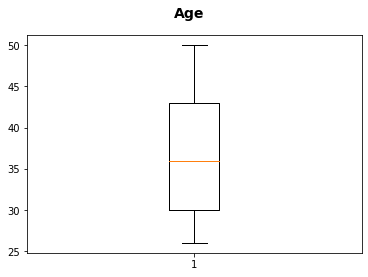

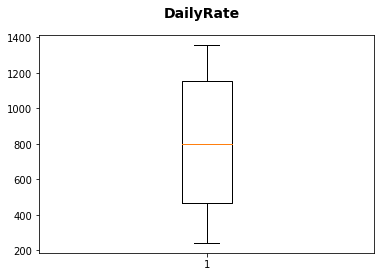

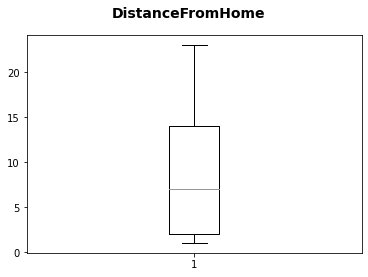

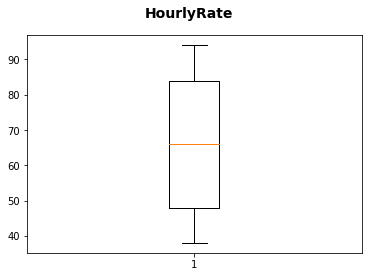

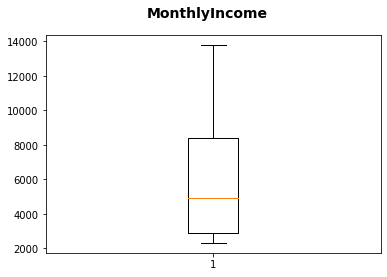

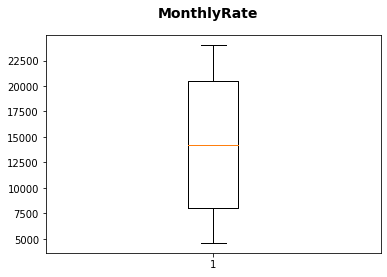

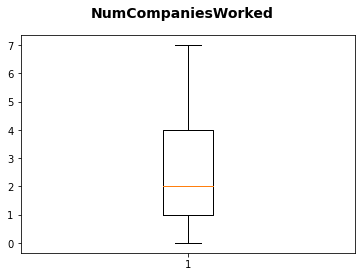

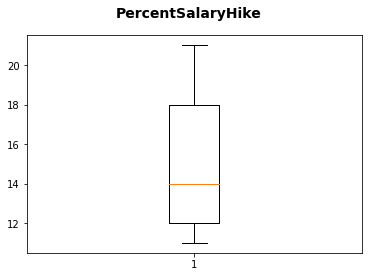

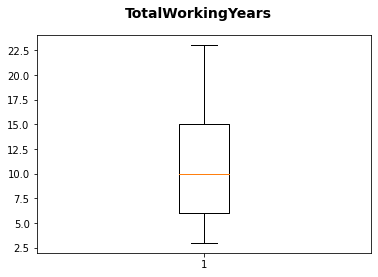

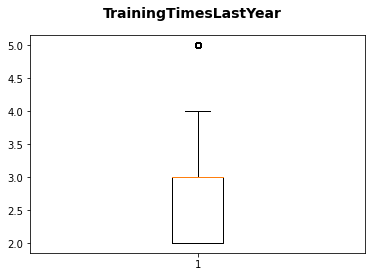

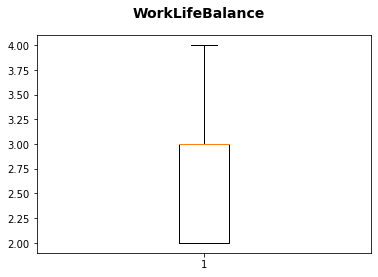

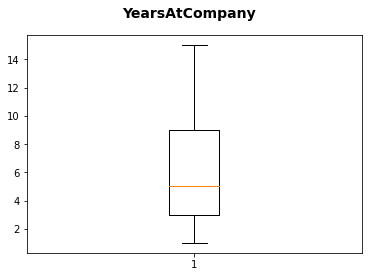

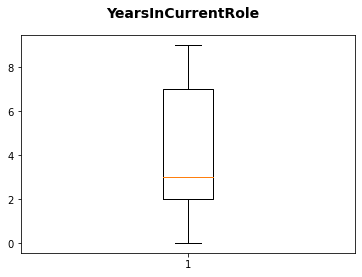

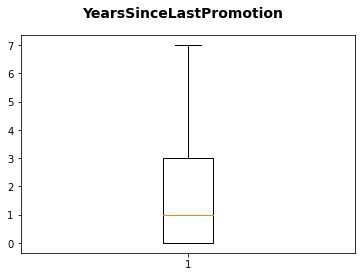

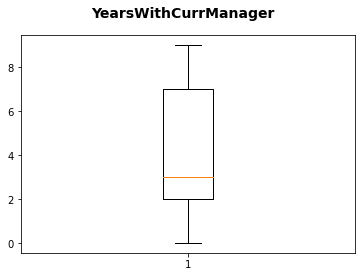

In [24]:
#Show modified data in boxplots again
Numeric_dic = {}
for x in Numeric_col:
    Numeric_dic[x]= df_copy[x].to_numpy()
    
for x in Numeric_dic:
    fig = plt.figure()
    fig.suptitle(x, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.boxplot(Numeric_dic[x])
    plt.show()

## 3)i) Numerical values

In [25]:
df_numeric = df[Numeric_col]

In [26]:
# Normalization for numerical data type
# To avoid biases towards particular feature

features = df_numeric.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df_numeric)
df_numeric = pd.DataFrame(scaler.transform(df_numeric))
df_numeric.columns = features

In [27]:
df_numeric

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.157143,0.082254,0.409396,0.444444,0.428571,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.365784,0.178571,0.171429,0.472986,0.777474,0.444444,0.285714,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.037938,0.107143,0.814286,0.270300,0.123670,0.111111,0.642857,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.659270,0.035714,0.471429,0.230700,0.447661,0.222222,0.214286,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


## 3)ii) Ordinal values

In [28]:
Ordinal_col = ['Education','EnvironmentSatisfaction', 'PerformanceRating', 'JobLevel', 'JobInvolvement', 
               'RelationshipSatisfaction', 'StockOptionLevel']

df_ordinal = df[Ordinal_col]
df_ordinal

,Education,EnvironmentSatisfaction,PerformanceRating,JobLevel,JobInvolvement,RelationshipSatisfaction,StockOptionLevel
0,2,2,3,2,3,1,0
1,1,3,4,2,2,4,1
2,2,4,3,1,2,2,0
3,4,4,3,1,3,3,0
4,1,1,3,1,3,4,1
...,...,...,...,...,...,...,...
1465,2,3,3,2,4,3,1
1466,1,4,3,3,2,1,1
1467,3,2,4,2,4,2,1
1468,3,4,3,2,2,4,0


#### Since ordinal data already converted into numerical values, no modificaiton required (Ordinal Encoder)

## 3)iii) Nominal values

#### Some of them are already convert into numerical values, we only have to identify and deal with the rest
#### Perform One-hot encoding also known as dummy variable encoding since it creates one binary variable for each category.

In [29]:
Nominal_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [30]:
df_nominal = df[Nominal_col]
df_nominal = pd.get_dummies(df_nominal)

In [31]:
df_nominal

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [32]:
#Compile all the data
df_numeric.reset_index(drop=True, inplace=True)
df_ordinal.reset_index(drop=True, inplace=True)
df_nominal.reset_index(drop=True, inplace=True)

merged_df = pd.concat([df_copy['Attrition'], df_numeric, df_ordinal, df_nominal],axis=1)

In [33]:
merged_df

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,PerformanceRating,JobLevel,JobInvolvement,RelationshipSatisfaction,StockOptionLevel,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0.547619,0.715820,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,2,2,3,2,3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0.738095,0.126700,0.250000,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,1,3,4,2,2,4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,1,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,2,4,3,1,2,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0.357143,0.923407,0.071429,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,4,4,3,1,3,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0.214286,0.350036,0.035714,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,1,1,3,1,3,4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0.428571,0.559771,0.785714,0.157143,0.082254,0.409396,0.444444,0.428571,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,2,3,3,2,4,3,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,0,0.500000,0.365784,0.178571,0.171429,0.472986,0.777474,0.444444,0.285714,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,1,4,3,3,2,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,0,0.214286,0.037938,0.107143,0.814286,0.270300,0.123670,0.111111,0.642857,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,3,2,4,2,4,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,0,0.738095,0.659270,0.035714,0.471429,0.230700,0.447661,0.222222,0.214286,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,3,4,3,2,2,4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


# 4)Modelling and Evaluation
## Models: Random Forest, Logistic Regression, SVM, Decision Tree

In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Independent variables
X = merged_df.drop(columns = ['Attrition'])

# Dependent variable
y = merged_df['Attrition']

In [35]:
# Split Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 4)i) Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

model_rf.fit(X_train.values, y_train.values)

# Prediction
prediction_test = model_rf.predict(X_test.values)

# Prediction accuracy
print('Acc Random Forest:',metrics.accuracy_score(y_test, prediction_test))

Acc Random Forest: 0.8639455782312925


In [37]:
cv_RF_scores_recall = cross_val_score(model_rf, X.values, y, cv=5,scoring='recall')
print(cv_RF_scores_recall)
print("Mean 5-Fold Recall for Random Forest: {}".format(np.mean(cv_RF_scores_recall)))

[0.10416667 0.16666667 0.17021277 0.12765957 0.08510638]
Mean 5-Fold Recall for Random Forest: 0.1307624113475177


## 4)ii) Logistic Regression

In [38]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(max_iter=1000)
result = model_lg.fit(X_train, y_train)

# Prediction
prediction_test = model_lg.predict(X_test)

# Prediction accuracy
print('Acc Logistic Regression:', metrics.accuracy_score(y_test, prediction_test))

Acc Logistic Regression: 0.8809523809523809


In [39]:
cv_LR_scores_recall = cross_val_score(model_lg, X, y, cv=5,scoring='recall')
print(cv_LR_scores_recall)
print("Mean 5-Fold Recall for Logistic Regression: {}".format(np.mean(cv_LR_scores_recall)))

[0.47916667 0.35416667 0.25531915 0.38297872 0.38297872]
Mean 5-Fold Recall for Logistic Regression: 0.3709219858156028


# 4)iii) SVM

In [40]:
from sklearn import svm

clf_SVM = svm.SVC(kernel='linear') # Linear Kernel
clf_SVM.fit(X_train, y_train)

#Prediction
y_pred = clf_SVM.predict(X_test)

# Prediction accuracy
print('Acc SVM: ',metrics.accuracy_score(y_test, y_pred))

Acc SVM:  0.8741496598639455


In [41]:
cv_SVM_scores_recall = cross_val_score(clf_SVM, X, y, cv=5,scoring='recall')
print(cv_SVM_scores_recall)
print("Mean 5-Fold Recall for Logistic Regression: {}".format(np.mean(cv_SVM_scores_recall)))

[0.33333333 0.33333333 0.27659574 0.38297872 0.40425532]
Mean 5-Fold Recall for Logistic Regression: 0.3460992907801418


# 4)iii) Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf_DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_DT = clf_DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_DT.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Acc Decision Tree:",metrics.accuracy_score(y_test, y_pred))

Acc Decision Tree: 0.8537414965986394


In [43]:
cv_DT_scores_recall = cross_val_score(clf_DT, X, y, cv=5,scoring='recall')
print(cv_SVM_scores_recall)
print("Mean 5-Fold Recall for Decision Tree: {}".format(np.mean(cv_DT_scores_recall)))

[0.33333333 0.33333333 0.27659574 0.38297872 0.40425532]
Mean 5-Fold Recall for Decision Tree: 0.1773049645390071


# Conclusion

## Imbalanced dataset and insufficient records for churned employee negatively affects models' performance. 
## The low recall scores for the 4 proposed models (around 0.1 ~ 0.3) are not surprising due to high dimensionality of the dataset. High accuracy is not reliable in this dataset since majority records in our dataset are not churn.